In [43]:
# A 'magic' command to display plots inline
%matplotlib inline

# Import all python modules. You need to run this cell for the other cells to work.
import requests 
import numpy as np
import pandas as pd
from datetime import datetime
import itertools
import altair as alt
from vega_datasets import data

# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [44]:
models = ['HadGEM2-ES', 'MIROC5', 'CNRM-CM5', 'CanESM2']

In [191]:
df_list = []
for model in models:
    file = 'data/csv/pr_rcp85_{}.csv'.format(model)
    model_data = pd.read_csv(file)
    model_data['date'] = pd.to_datetime(model_data['date'])
    model_data = model_data.set_index('date')
    model_data['model'] = model
    annual_totals = []
    
    for year in np.arange(2006, 2100):
        df = pd.DataFrame(model_data[(model_data.index.year == year)])
        sum = np.sum(df['value'])
        df['annual_total'] = sum
        df['proportion'] = df['value'] / sum
        df.sort_values('proportion', inplace = True, ascending=False)
        df['cumsum'] = df.value.cumsum() 
        df_list.append(df)

In [192]:
modeled_data = pd.concat(df_list)
modeled_data

,value,model,annual_total,proportion,cumsum
date,,,,,
2006-01-16,63.087779,HadGEM2-ES,3296.723764,0.019137,63.087779
2006-04-10,61.365222,HadGEM2-ES,3296.723764,0.018614,124.453001
2006-12-29,60.013545,HadGEM2-ES,3296.723764,0.018204,184.466546
2006-03-12,58.513679,HadGEM2-ES,3296.723764,0.017749,242.980225
2006-12-27,57.126812,HadGEM2-ES,3296.723764,0.017328,300.107037
2006-12-28,51.097495,HadGEM2-ES,3296.723764,0.015499,351.204532
2006-11-21,45.117996,HadGEM2-ES,3296.723764,0.013686,396.322528
2006-01-03,39.917197,HadGEM2-ES,3296.723764,0.012108,436.239725
2006-12-26,39.599619,HadGEM2-ES,3296.723764,0.012012,475.839345


In [193]:
df_list = []
file = 'data/csv/livneh_pr.csv'
livneh_data = pd.read_csv(file)
livneh_data['date'] = pd.to_datetime(livneh_data['date'])
livneh_data = livneh_data.set_index('date')
livneh_data['model'] = 'Observed'

for year in np.arange(1950, 2006):
    df = pd.DataFrame(livneh_data[(livneh_data.index.year == year)])
    sum = np.sum(df['value'])
    df['annual_total'] = sum
    df['proportion'] = df['value'] / sum
    df.sort_values('proportion', inplace = True, ascending=False)
    df['cumsum'] = df.value.cumsum() 
    df_list.append(df)

In [194]:
observed_data = pd.concat(df_list)
observed_data

,value,model,annual_total,proportion,cumsum
date,,,,,
1950-10-28,91.251968,Observed,1841.801839,0.049545,91.251968
1950-10-27,80.822189,Observed,1841.801839,0.043882,172.074158
1950-10-29,63.859795,Observed,1841.801839,0.034672,235.933952
1950-11-16,52.931831,Observed,1841.801839,0.028739,288.865784
1950-12-03,51.710804,Observed,1841.801839,0.028076,340.576588
1950-12-02,47.310966,Observed,1841.801839,0.025687,387.887554
1950-01-17,46.609375,Observed,1841.801839,0.025306,434.496929
1950-10-26,43.130836,Observed,1841.801839,0.023418,477.627766
1950-01-10,32.727409,Observed,1841.801839,0.017769,510.355175


In [195]:
df_list = []
for model in models:
    file = 'data/csv/pr_historical_{}.csv'.format(model)
    model_data = pd.read_csv(file)
    model_data['date'] = pd.to_datetime(model_data['date'])
    model_data = model_data.set_index('date')
    model_data['model'] = model
    annual_totals = []
    
    for year in np.arange(1950, 2006):
        df = pd.DataFrame(model_data[(model_data.index.year == year)])
        sum = np.sum(df['value'])
        df['annual_total'] = sum
        df['proportion'] = df['value'] / sum
        df.sort_values('proportion', inplace = True, ascending=False)
        df['cumsum'] = df.value.cumsum() 
        df_list.append(df)

In [196]:
historical_modeled = pd.concat(df_list)
historical_modeled

,value,model,annual_total,proportion,cumsum
date,,,,,
1950-03-23,42.793783,HadGEM2-ES,991.116541,0.043177,42.793783
1950-02-28,37.888328,HadGEM2-ES,991.116541,0.038228,80.682111
1950-02-27,32.890467,HadGEM2-ES,991.116541,0.033185,113.572579
1950-03-10,27.208792,HadGEM2-ES,991.116541,0.027453,140.781370
1950-02-26,27.139925,HadGEM2-ES,991.116541,0.027383,167.921295
1950-03-01,24.575186,HadGEM2-ES,991.116541,0.024795,192.496482
1950-01-17,24.541629,HadGEM2-ES,991.116541,0.024762,217.038111
1950-12-15,23.357148,HadGEM2-ES,991.116541,0.023567,240.395259
1950-01-13,22.877305,HadGEM2-ES,991.116541,0.023082,263.272564


In [197]:
data = pd.concat([observed_data, modeled_data, historical_modeled])

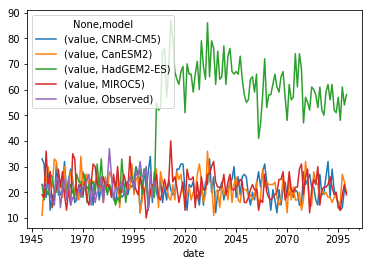

In [198]:
wettest = data.loc[data['cumsum'] < data['annual_total'] / 2]
wettest = wettest.groupby('model').resample('1AS').count()
wettest = wettest.drop(['model', 'annual_total', 'proportion', 'cumsum'], axis=1)
wettest.unstack('model').plot()

In [199]:
# Filter data by baseline time period
baseline = data.loc['1961-01-01':'1990-12-31']
threshold = baseline['value'].quantile(0.98, interpolation='linear')
print('Extreme Precipitation Threshold value for North Coast is', round(threshold, 1), 'mm')

Extreme Precipitation Threshold value for North Coast is 33.4 mm


In [200]:
# Filter days > threshold
extreme_days = pd.DataFrame(data[data.value > threshold])
extreme_days = extreme_days.drop(['annual_total', 'proportion', 'cumsum'], axis=1)
extreme_days

,value,model
date,,
1950-10-28,91.251968,Observed
1950-10-27,80.822189,Observed
1950-10-29,63.859795,Observed
1950-11-16,52.931831,Observed
1950-12-03,51.710804,Observed
1950-12-02,47.310966,Observed
1950-01-17,46.609375,Observed
1950-10-26,43.130836,Observed
1951-02-04,61.059948,Observed


In [201]:
#count_by_year = extreme_days.groupby(['model']).value.resample('1AS').count().unstack('model')
count_by_year = extreme_days.groupby(['model']).value.resample('1AS').count()
#count_by_year.to_csv('data/csv/count_by_year_rcp85.csv')

In [202]:
count_by_year = pd.DataFrame(count_by_year).reset_index()
count_by_year

,model,date,value
0,CNRM-CM5,1950-01-01,11
1,CNRM-CM5,1951-01-01,5
2,CNRM-CM5,1952-01-01,9
3,CNRM-CM5,1953-01-01,12
4,CNRM-CM5,1954-01-01,3
5,CNRM-CM5,1955-01-01,9
6,CNRM-CM5,1956-01-01,4
7,CNRM-CM5,1957-01-01,11
8,CNRM-CM5,1958-01-01,12
9,CNRM-CM5,1959-01-01,7


In [203]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Lato');
</style>

In [204]:
def urban_theme():
    # Typography
    font = "Lato"
    # At Urban it's the same font for all text but it's good to keep them separate in case you want to change one later.
    labelFont = "Lato" 
    sourceFont = "Lato"

    # Axes
    axisColor = "#000000"
    gridColor = "#DEDDDD"

    return {
        # width and height are configured outside the config dict because they are Chart configurations/properties not chart-elements' configurations/properties.
        "width": 685, # from the guide
        "height": 400, # not in the guide
        "config": {
            "title": {
                "fontSize": 20,
                "font": font,
                "anchor": "start", # equivalent of left-aligned.
                "fontColor": "#000000",
                "offset": 100,
            },
            "axisX": {
                "domain": True,
                "domainColor": axisColor,
                "domainWidth": 1,
                "grid": False,
                "labelFont": labelFont,
                "labelFontSize": 12,
                "labelAngle": 0, 
                "tickColor": axisColor,
                "tickSize": 5, # default, including it just to show you can change it
                "titleFont": font,
                "titleFontSize": 12,
                "titlePadding": 10, # guessing, not specified in styleguide
                "title": "X Axis Title (units)", 
            },
            "axisY": {
                "domain": False,
                "grid": True,
                "gridColor": gridColor,
                "gridWidth": 1,
                "labelFont": labelFont,
                "labelFontSize": 12,
                "labelAngle": 0, 
                "ticks": False, # even if you don't have a "domain" you need to turn these off.
                "titleFont": font,
                "titleFontSize": 12,
                "titlePadding": 10, # guessing, not specified in styleguide
                "title": "Y Axis Title (units)", 
            },
            "legend": {
                "labelFont": labelFont,
                "labelFontSize": 12,
                "symbolType": "square", # just 'cause
                "symbolSize": 100, # default
                "titleFont": font,
                "titleFontSize": 12,
                "title": "", # set it to no-title by default
                "orient": "top-left", # so it's right next to the y-axis
                "offset": 30, # literally right next to the y-axis.
            },
            "view": {
                "stroke": "transparent", # altair uses gridlines to box the area where the data is visualized. This takes that off.
            },
        }
    }

In [205]:
alt.themes.register("my_custom_theme", urban_theme)
alt.themes.enable("my_custom_theme")

ThemeRegistry.enable('my_custom_theme')

In [206]:
scale = alt.Scale(domain=['CanESM2', 'CNRM-CM5', 'HadGEM2-ES', 'MIROC5', 'Observed'],
                  range=['rgb(188, 189, 34)', 'rgb(23, 190, 207)', 'rgb(214, 39, 40)', 'rgb(148, 103, 189)', '#000'])

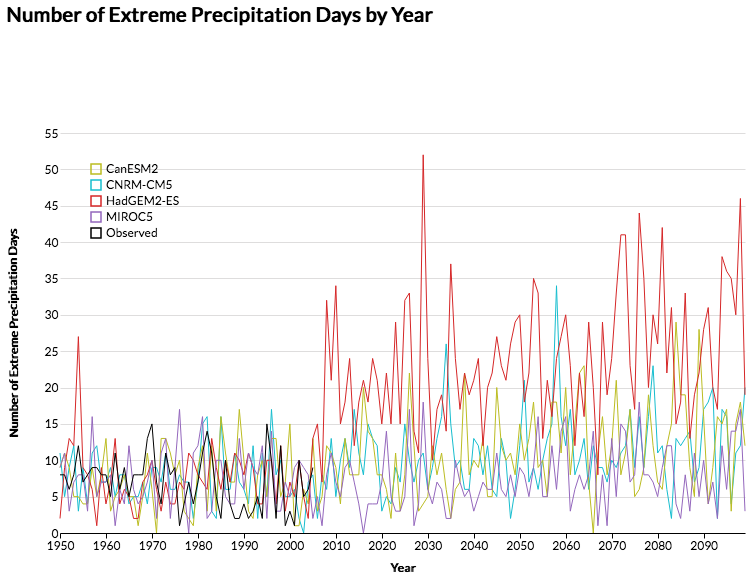

In [207]:
alt.Chart(count_by_year).mark_line(strokeWidth=1).encode(
    x=alt.X('date', axis=alt.Axis(title='Year'), ),
    y=alt.Y('value', axis=alt.Axis(title='Number of Extreme Precipitation Days')),
    color=alt.Color('model', legend=alt.Legend(title=''), scale=scale),
).properties(
    title='Number of Extreme Precipitation Days by Year'
)